<a href="https://colab.research.google.com/github/nelsongcn/Atividades-IGTI/blob/main/Projeto_aplicado_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U imbalanced-learn

# Projeto Aplicado MBA Data Science

In [ ]:
import pandas as pd

### Carregando os dados 

Dados foram baixados da pllataforma Kaggle no seguinte link:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
dados = pd.read_csv('dados.csv')

### Visualizando amostra dos dados 

In [ ]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Tamanho do dataframe

In [ ]:
dados.shape

(7043, 21)

### Analisando os tipos de dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Ampliando a visualização do número de colunas

In [ ]:
pd.set_option("display.max_columns",30)
dados

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Traduzindo os rótulos das colunas

In [ ]:
dados = dados.rename(columns={'customerID': 'IDcliente', "gender": "sexo", "SeniorCitizen": "idoso", "Partner": "parceiro", "Dependents": "dependentes", "tenure": "tempo_contrato", "PhoneService": "servico_telefonico",
                   "MultipleLines": "multiplas_linhas", "InternetService": "servico_internet", "OnlineSecurity": "seguranca_online", "OnlineBackup": "backup_online", "DeviceProtection": "protecao_dispositivo",
                   "TechSupport": "suporte_tecnico", "StreamingTV": "TV_a_cabo", "StreamingMovies": "streaming_filmes", "Contract": "tipo_contrato", "PaperlessBilling": "conta_online", "PaymentMethod": "forma_pagamento",
                   "MonthlyCharges": "gastos_mes", "TotalCharges": "gastos_total"})

In [ ]:
dados

,IDcliente,sexo,idoso,parceiro,dependentes,tempo_contrato,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,conta_online,forma_pagamento,gastos_mes,gastos_total,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Verificando Inconsistencias nos Dados

In [ ]:
colunas = dados.columns.tolist()
for coluna in colunas:
  print(f'A coluna {coluna} tem as seguintes informações: {dados[coluna].unique()}')

A coluna IDcliente tem as seguintes informações: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
A coluna sexo tem as seguintes informações: ['Female' 'Male']
A coluna idoso tem as seguintes informações: [0 1]
A coluna parceiro tem as seguintes informações: ['Yes' 'No']
A coluna dependentes tem as seguintes informações: ['No' 'Yes']
A coluna tempo_contrato tem as seguintes informações: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
A coluna servico_telefonico tem as seguintes informações: ['No' 'Yes']
A coluna multiplas_linhas tem as seguintes informações: ['No phone service' 'No' 'Yes']
A coluna servico_internet tem as seguintes informações: ['DSL' 'Fiber optic' 'No']
A coluna seguranca_online tem as seguintes informações: ['No' 'Yes' 'No internet service']
A coluna backup_o

### Traduzindo os dados

In [ ]:
dados.replace({'Female':'Feminino', 'Male':'Masculino', 'Yes':'Sim', 'No':'Nao', 'No phone service':'Sem servico telefonico',
              'Fiber optic':'Fibra otica', 'No internet service':'Sem servico de internet', 'Month-to-month':'Mensal', 
              'One year':'Um ano', 'Two year':'Dois anos', 'Electronic check': 'Cheque eletrônico', 'Mailed check':'Cheque',
               'Bank transfer (automatic)': 'Transferência bancaria', 'Credit card (automatic)': 'Cartão de credito'},  inplace = True)


In [ ]:
dados.idoso.replace({0:'Nao', 1:'Sim'},  inplace = True)

In [ ]:
colunas = dados.columns.tolist()
for coluna in colunas:
  print(f'A coluna {coluna} tem as seguintes informações: {dados[coluna].unique()}')

A coluna IDcliente tem as seguintes informações: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
A coluna sexo tem as seguintes informações: ['Feminino' 'Masculino']
A coluna idoso tem as seguintes informações: ['Nao' 'Sim']
A coluna parceiro tem as seguintes informações: ['Sim' 'Nao']
A coluna dependentes tem as seguintes informações: ['Nao' 'Sim']
A coluna tempo_contrato tem as seguintes informações: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
A coluna servico_telefonico tem as seguintes informações: ['Nao' 'Sim']
A coluna multiplas_linhas tem as seguintes informações: ['Sem servico telefonico' 'Nao' 'Sim']
A coluna servico_internet tem as seguintes informações: ['DSL' 'Fibra otica' 'Nao']
A coluna seguranca_online tem as seguintes informações: ['Nao' 'Sim' 'Sem servico 

### Mudanto o tipo de dados da coluna gastos_total de obj para float

In [ ]:
dados['gastos_total'] = pd.to_numeric(dados['gastos_total'], errors='coerce')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDcliente             7043 non-null   object 
 1   sexo                  7043 non-null   object 
 2   idoso                 7043 non-null   object 
 3   parceiro              7043 non-null   object 
 4   dependentes           7043 non-null   object 
 5   tempo_contrato        7043 non-null   int64  
 6   servico_telefonico    7043 non-null   object 
 7   multiplas_linhas      7043 non-null   object 
 8   servico_internet      7043 non-null   object 
 9   seguranca_online      7043 non-null   object 
 10  backup_online         7043 non-null   object 
 11  protecao_dispositivo  7043 non-null   object 
 12  suporte_tecnico       7043 non-null   object 
 13  TV_a_cabo             7043 non-null   object 
 14  streaming_filmes      7043 non-null   object 
 15  tipo_contrato        

Existe 11 valores nulos em gastos totais

In [ ]:
dados[dados['gastos_total'].isna()]

,IDcliente,sexo,idoso,parceiro,dependentes,tempo_contrato,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,conta_online,forma_pagamento,gastos_mes,gastos_total,Churn
488,4472-LVYGI,Feminino,Nao,Sim,Sim,0,Nao,Sem servico telefonico,DSL,Sim,Nao,Sim,Sim,Sim,Nao,Dois anos,Sim,Transferência bancaria,52.55,NaN,Nao
753,3115-CZMZD,Masculino,Nao,Nao,Sim,0,Sim,Nao,Nao,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Dois anos,Nao,Cheque,20.25,NaN,Nao
936,5709-LVOEQ,Feminino,Nao,Sim,Sim,0,Sim,Nao,DSL,Sim,Sim,Sim,Nao,Sim,Sim,Dois anos,Nao,Cheque,80.85,NaN,Nao
1082,4367-NUYAO,Masculino,Nao,Sim,Sim,0,Sim,Sim,Nao,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Dois anos,Nao,Cheque,25.75,NaN,Nao
1340,1371-DWPAZ,Feminino,Nao,Sim,Sim,0,Nao,Sem servico telefonico,DSL,Sim,Sim,Sim,Sim,Sim,Nao,Dois anos,Nao,Cartão de credito,56.05,NaN,Nao
3331,7644-OMVMY,Masculino,Nao,Sim,Sim,0,Sim,Nao,Nao,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Dois anos,Nao,Cheque,19.85,NaN,Nao
3826,3213-VVOLG,Masculino,Nao,Sim,Sim,0,Sim,Sim,Nao,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Dois anos,Nao,Cheque,25.35,NaN,Nao
4380,2520-SGTTA,Feminino,Nao,Sim,Sim,0,Sim,Nao,Nao,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Dois anos,Nao,Cheque,20.00,NaN,Nao
5218,2923-ARZLG,Masculino,Nao,Sim,Sim,0,Sim,Nao,Nao,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Sem servico de internet,Um ano,Sim,Cheque,19.70,NaN,Nao
6670,4075-WKNIU,Feminino,Nao,Sim,Sim,0,Sim,Sim,DSL,Nao,Sim,Sim,Sim,Sim,Nao,Dois anos,Nao,Cheque,73.35,NaN,Nao


Os valores nulos da coluna gastos_total tem relação com tempo de contrato no valor 0. Possivelmente se trata de contratos novos, mas pra não ter duvida irei eliminar esse valores também.

In [ ]:
dados = dados.dropna()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDcliente             7032 non-null   object 
 1   sexo                  7032 non-null   object 
 2   idoso                 7032 non-null   object 
 3   parceiro              7032 non-null   object 
 4   dependentes           7032 non-null   object 
 5   tempo_contrato        7032 non-null   int64  
 6   servico_telefonico    7032 non-null   object 
 7   multiplas_linhas      7032 non-null   object 
 8   servico_internet      7032 non-null   object 
 9   seguranca_online      7032 non-null   object 
 10  backup_online         7032 non-null   object 
 11  protecao_dispositivo  7032 non-null   object 
 12  suporte_tecnico       7032 non-null   object 
 13  TV_a_cabo             7032 non-null   object 
 14  streaming_filmes      7032 non-null   object 
 15  tipo_contrato        

### Salvando / Exportando dados

In [ ]:
dados.to_csv('dados_tratados.csv', sep = ';')

### Análise estatistica

In [ ]:
dados.describe()

,tempo_contrato,gastos_mes,gastos_total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Utilizando a biblioteca Seaborn 

O seaborn é uma biblioteca de visualização de dados 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

O percentual de clientes que cancelaram a assinarura é de 26.58%
O percentual de clientes que não cancelaram a assinarura é de 73.42%


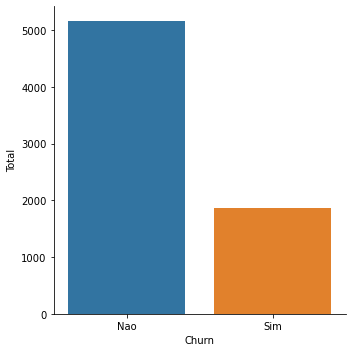

In [ ]:
sns.catplot(data=dados,x = 'Churn' , kind ='count' )
plt.ylabel('Total')
churn = dados.Churn
churn_percentual = churn.value_counts(normalize = True).round(4) * 100
print(f'O percentual de clientes que cancelaram a assinarura é de {churn_percentual[1]}%')
print(f'O percentual de clientes que não cancelaram a assinarura é de {churn_percentual[0]}%')

Text(0.5, 0.98, 'Distribuição dos gastos Totais')

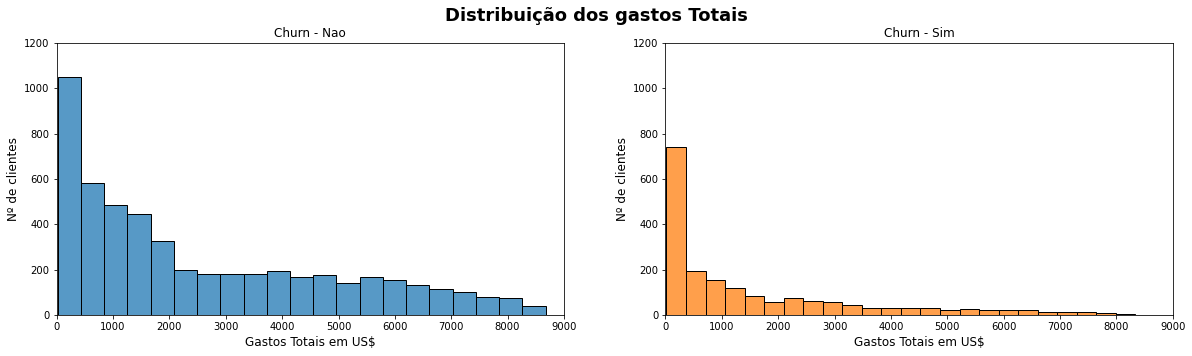

In [ ]:
janela, graficos = plt.subplots(ncols=2, figsize=(20,5))
sns.histplot(data=dados.loc[churn == 'Nao'], x='gastos_total', ax=graficos[0])
sns.histplot(data=dados.loc[churn == 'Sim'], x='gastos_total', ax=graficos[1], color = sns.color_palette()[1])
graficos[0].set_title('Churn - Nao')
graficos[1].set_title('Churn - Sim')

for grafico in graficos:
    grafico.set_xlim(0,9000)
    grafico.set_ylim(0,1200)
    grafico.set_xlabel('Gastos Totais em US$', fontsize=12)
    grafico.set_ylabel('Nº de clientes', fontsize=12)
    
janela.suptitle(f'Distribuição dos gastos Totais', fontsize=18, weight='bold')


Text(0.5, 0.98, 'Distribuição dos gastos Mensais')

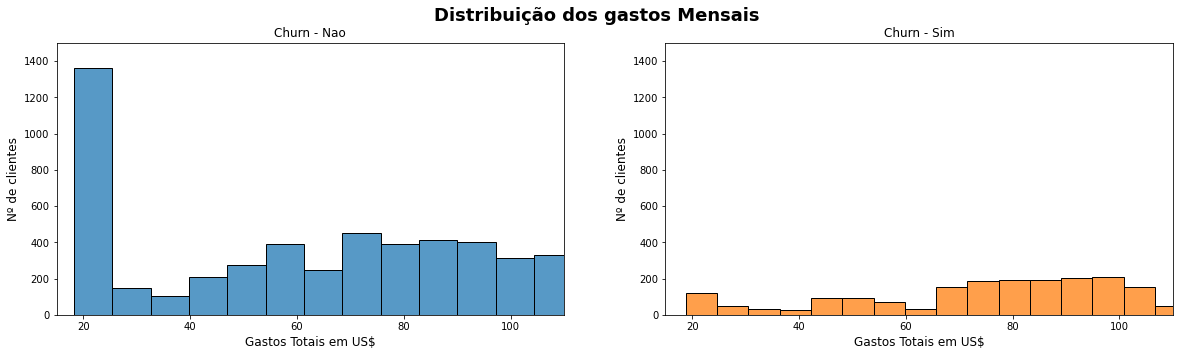

In [ ]:
janela, graficos = plt.subplots(ncols=2, figsize=(20,5))
sns.histplot(data=dados.loc[churn == 'Nao'], x='gastos_mes', ax=graficos[0])
sns.histplot(data=dados.loc[churn == 'Sim'], x='gastos_mes', ax=graficos[1], color = sns.color_palette()[1])
graficos[0].set_title('Churn - Nao')
graficos[1].set_title('Churn - Sim')

for grafico in graficos:
    grafico.set_xlim(15,110)
    grafico.set_ylim(0,1500)
    grafico.set_xlabel('Gastos Totais em US$', fontsize=12)
    grafico.set_ylabel('Nº de clientes', fontsize=12)
    
janela.suptitle(f'Distribuição dos gastos Mensais', fontsize=18, weight='bold')


Text(0.5, 0.98, 'Distribuição de tempo de contrato')

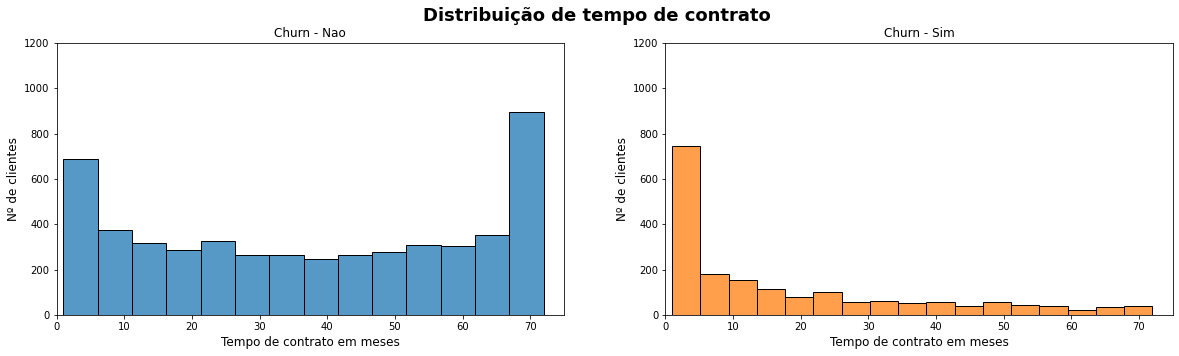

In [ ]:
janela, graficos = plt.subplots(ncols=2, figsize=(20,5))
sns.histplot(data=dados.loc[churn == 'Nao'], x='tempo_contrato', ax=graficos[0])
sns.histplot(data=dados.loc[churn == 'Sim'], x='tempo_contrato', ax=graficos[1], color = sns.color_palette()[1])
graficos[0].set_title('Churn - Nao')
graficos[1].set_title('Churn - Sim')

for grafico in graficos:
    grafico.set_xlim(0,75)
    grafico.set_ylim(0,1200)
    grafico.set_xlabel('Tempo de contrato em meses', fontsize=12)
    grafico.set_ylabel('Nº de clientes', fontsize=12)
    
janela.suptitle(f'Distribuição de tempo de contrato', fontsize=18, weight='bold')


Text(0.5, 0.98, 'Perfil dos Clientes')

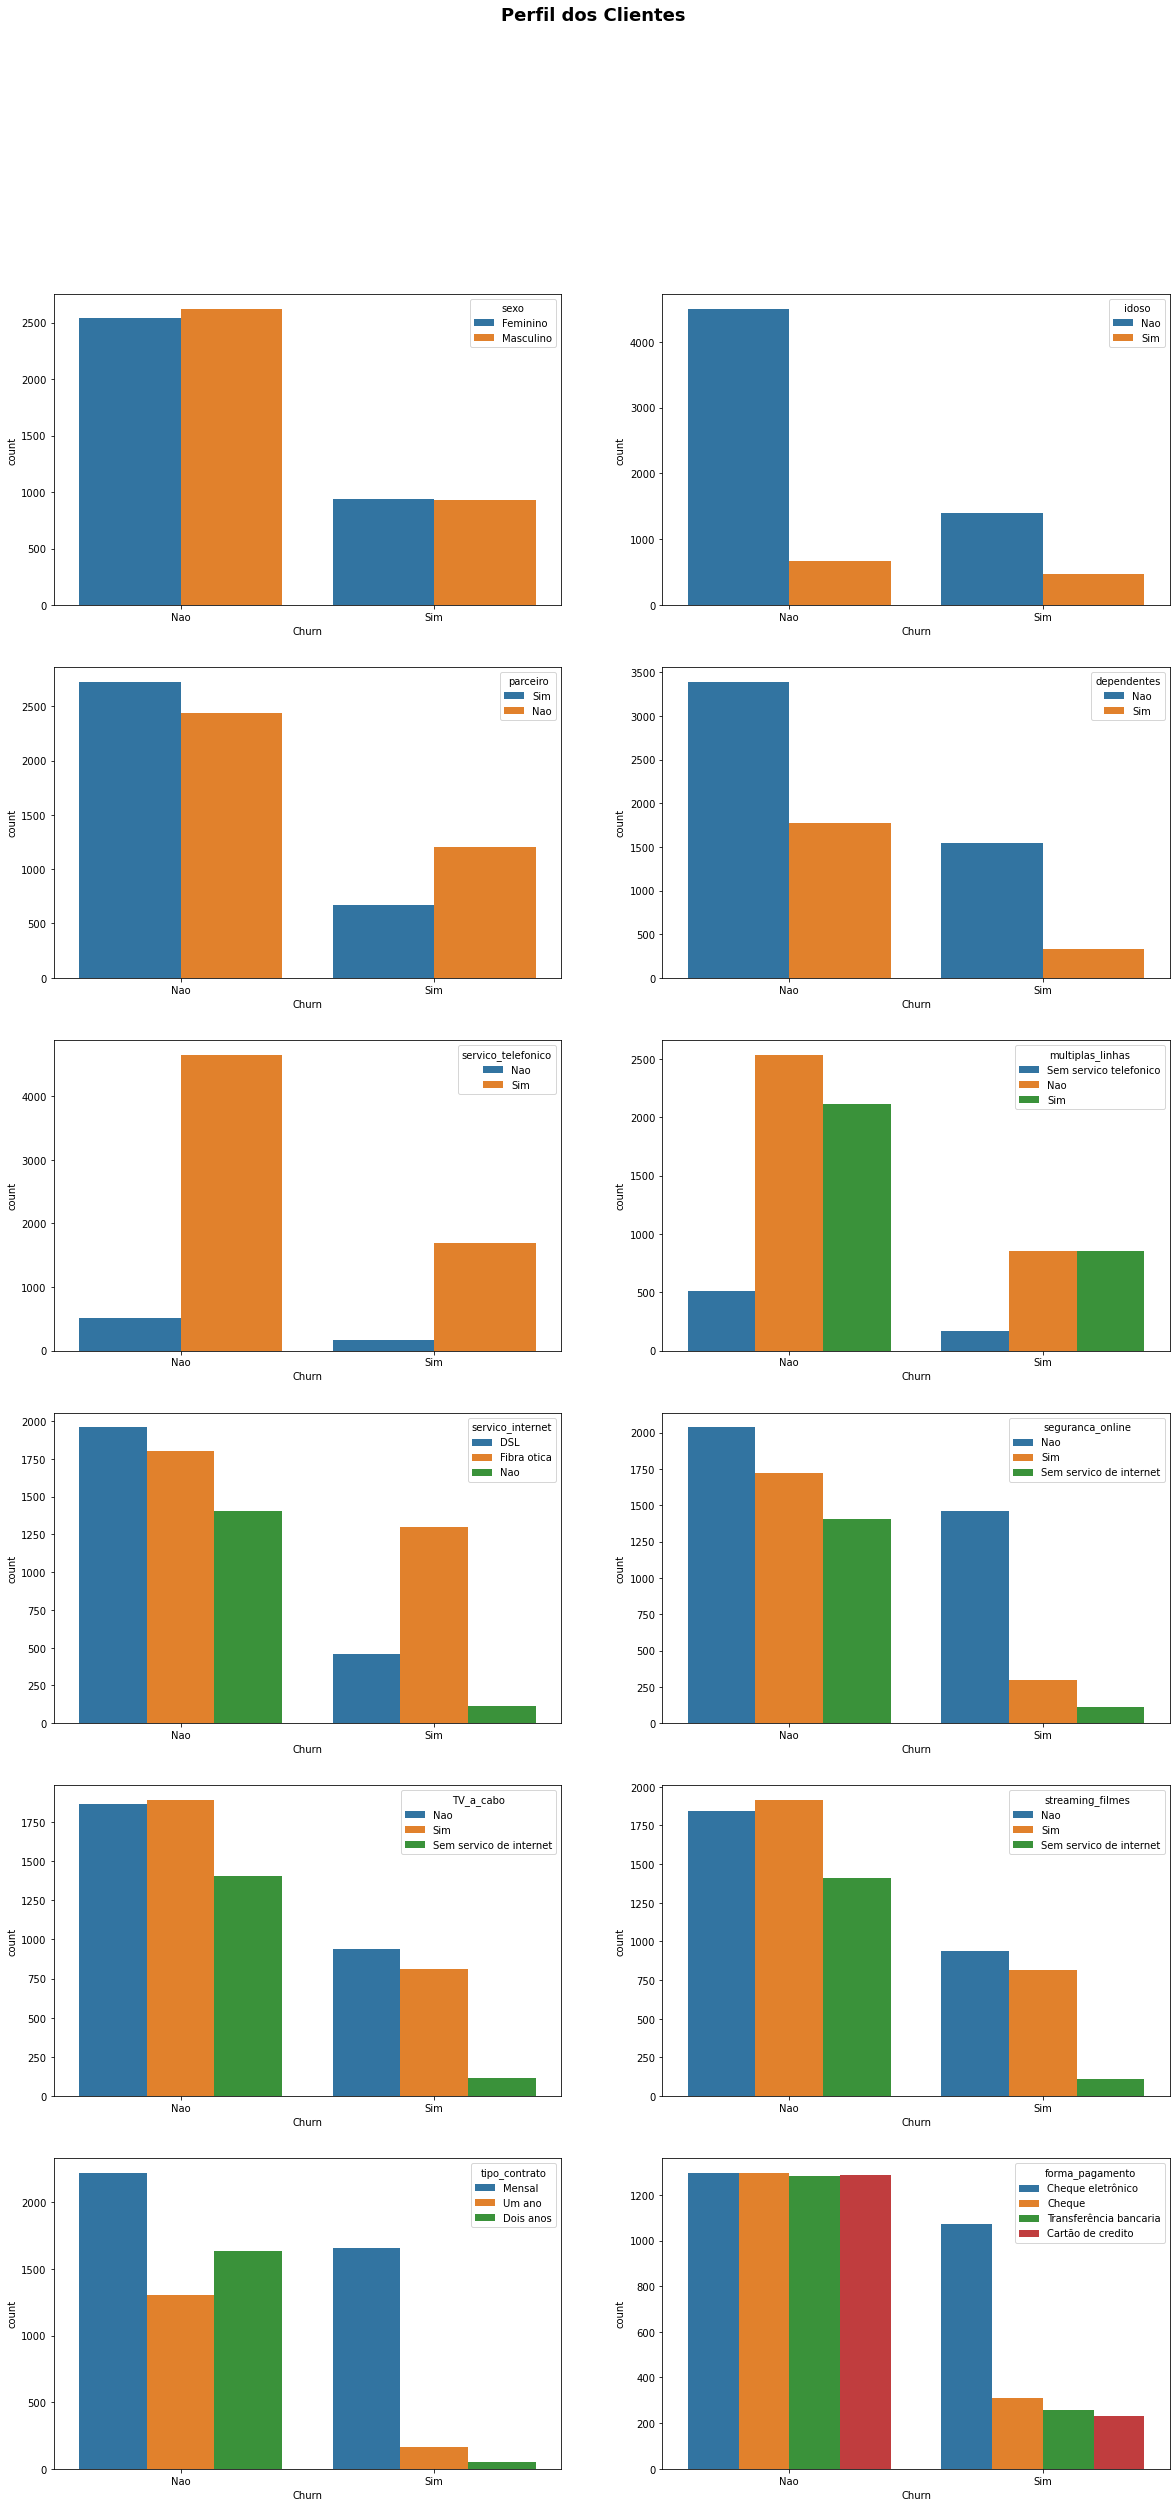

In [ ]:
janela, graficos = plt.subplots(nrows=6, ncols=2, figsize=(20,40))
sns.countplot(data=dados, x="Churn", hue="sexo", ax=graficos[0][0])
sns.countplot(data=dados, x="Churn", hue="idoso", ax=graficos[0][1])
sns.countplot(data=dados, x="Churn", hue="parceiro", ax=graficos[1][0])
sns.countplot(data=dados, x="Churn", hue="dependentes", ax=graficos[1][1])
sns.countplot(data=dados, x="Churn", hue="servico_telefonico", ax=graficos[2][0])
sns.countplot(data=dados, x="Churn", hue="multiplas_linhas", ax=graficos[2][1])
sns.countplot(data=dados, x="Churn", hue="servico_internet", ax=graficos[3][0])
sns.countplot(data=dados, x="Churn", hue="seguranca_online", ax=graficos[3][1])
sns.countplot(data=dados, x="Churn", hue="TV_a_cabo", ax=graficos[4][0])
sns.countplot(data=dados, x="Churn", hue="streaming_filmes", ax=graficos[4][1])
sns.countplot(data=dados, x="Churn", hue="tipo_contrato", ax=graficos[5][0])
sns.countplot(data=dados, x="Churn", hue="forma_pagamento", ax=graficos[5][1])
janela.suptitle(f'Perfil dos Clientes', fontsize=18, weight='bold')

### Matriz de correlação

Para a realização dessa matriz, é necessário a mudança dos dados categóricos para binários

In [ ]:
dados.corr()

,tempo_contrato,gastos_mes,gastos_total
tempo_contrato,1.000000,0.246862,0.825880
gastos_mes,0.246862,1.000000,0.651065
gastos_total,0.825880,0.651065,1.000000


<AxesSubplot:>

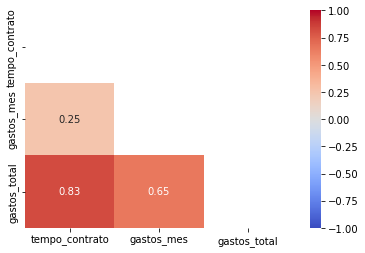

In [ ]:
mask = np.triu(np.ones_like(dados.corr(), dtype=bool))
sns.heatmap(dados.corr(), annot =True, vmin=-1, vmax=1, cmap='coolwarm', mask = mask)

Modificação Manual de aguns valores 

In [ ]:
dados = dados.replace({'Sim':1, 'Nao':0, 'Feminino' : 1, 'Masculino':0, 'Sem servico telefonico':0, 'Sem servico de internet':0})
dados.head()

,IDcliente,sexo,idoso,parceiro,dependentes,tempo_contrato,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,TV_a_cabo,streaming_filmes,tipo_contrato,conta_online,forma_pagamento,gastos_mes,gastos_total,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Mensal,1,Cheque eletrônico,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,Um ano,0,Cheque,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Mensal,1,Cheque,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,Um ano,0,Transferência bancaria,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fibra otica,0,0,0,0,0,0,Mensal,1,Cheque eletrônico,70.70,151.65,1


Modificação utilizando get dummies

In [ ]:
dados_dummie = pd.get_dummies(dados[['servico_internet','tipo_contrato', 'forma_pagamento' ]])
dados_dummie.head()

,servico_internet_0,servico_internet_DSL,servico_internet_Fibra otica,tipo_contrato_Dois anos,tipo_contrato_Mensal,tipo_contrato_Um ano,forma_pagamento_Cartão de credito,forma_pagamento_Cheque,forma_pagamento_Cheque eletrônico,forma_pagamento_Transferência bancaria
0,0,1,0,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0


Juntando aas duas maneiras

In [ ]:
dados_removidos = dados.drop(['servico_internet','tipo_contrato', 'forma_pagamento' ], axis=1)
dados_final = pd.concat([dados_removidos, dados_dummie], axis =1 )


In [ ]:
dados_final.shape

(7032, 28)

In [ ]:
colunas = dados_final.columns.tolist()
for coluna in colunas:
  print(f'A coluna {coluna} tem as seguintes informações: {dados_final[coluna].unique()}')

A coluna IDcliente tem as seguintes informações: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
A coluna sexo tem as seguintes informações: [1 0]
A coluna idoso tem as seguintes informações: [0 1]
A coluna parceiro tem as seguintes informações: [1 0]
A coluna dependentes tem as seguintes informações: [0 1]
A coluna tempo_contrato tem as seguintes informações: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
A coluna servico_telefonico tem as seguintes informações: [0 1]
A coluna multiplas_linhas tem as seguintes informações: [0 1]
A coluna seguranca_online tem as seguintes informações: [0 1]
A coluna backup_online tem as seguintes informações: [1 0]
A coluna protecao_dispositivo tem as seguintes informações: [0 1]
A coluna suporte_tecnico tem as seguintes informações: [0 1]
A colu

<AxesSubplot:>

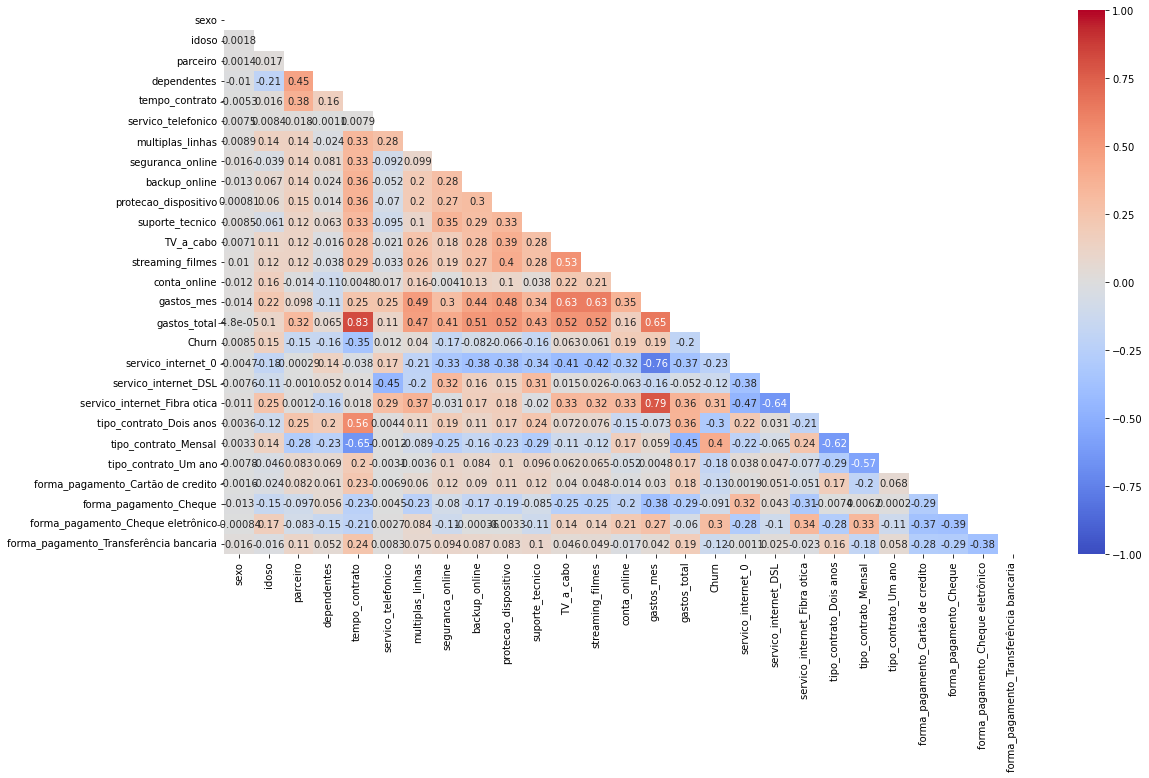

In [ ]:
plt.figure(figsize=(18, 10))
mask = np.triu(np.ones_like(dados_final.corr(), dtype=bool))
sns.heatmap(dados_final.corr(), annot =True, vmin=-1, vmax=1, cmap='coolwarm', mask = mask)

### Realizando pré processamento e importando bibliotecas necessárias

In [ ]:
from sklearn.model_selection import train_test_split # Separa os dados de treino e teste
from sklearn.preprocessing import StandardScaler     # Ferramenta para otimizar a escala de números

from sklearn.dummy import DummyClassifier            # Modelo simples para servir de parametro (Baseline)
from sklearn.svm import SVC                          # Modelo Suport Vector Classification
from sklearn.tree import DecisionTreeClassifier      # Modelo Arvore de Decisão
from sklearn.neighbors import KNeighborsClassifier   # Modelo classificação baseado em visinhos
from sklearn.naive_bayes import BernoulliNB          # Modelo probabilistico de Bernoulli Naive Bayes

from sklearn.metrics import accuracy_score           # Apresenta a acurácia 
from sklearn.metrics import precision_score          # Apresenta a precisão
from sklearn.metrics import recall_score             # Apresenta o Recall, conhecido como revocação ou sensibilidade

from imblearn.over_sampling import SMOTE             # Para balancear a amostra

Separando os dados em X e Y

In [ ]:
x = dados_final.drop(['IDcliente','Churn'], axis =1)
y = dados_final['Churn']

In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
smt = SMOTE(random_state=20)
x, y = smt.fit_resample(x, y)

In [ ]:
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
SEED = 20
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

In [ ]:
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [ ]:
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')

Treinaremos com 7744 elementos e testaremos com 2582 elementos


In [ ]:
# Modelo Dummy para Baseline

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes_dummy = dummy.predict(teste_x)
acuracia_dummy = accuracy_score(teste_y, previsoes_dummy) * 100
precisao_dummy = precision_score(teste_y, previsoes_dummy) * 100
sensibilidade_dummy = recall_score(teste_y, previsoes_dummy) * 100

print(f'A acurácia foi {acuracia_dummy:.2f}%')
print(f'A precisão foi {precisao_dummy:.2f}%')
print(f'A sensibilidade foi {sensibilidade_dummy:.2f}%')

A acurácia foi 50.00%
A precisão foi 0.00%
A sensibilidade foi 0.00%


C:\Users\nelso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ultilizando Modelo de classificação SVC (Suport Vector Classification) do Scikitlearn - Algoritmo classificador blackbox (caixapreta)

In [ ]:
# Modelo SVC

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes_svc = modelo.predict(teste_x)
acuracia_svc = accuracy_score(teste_y, previsoes_svc) * 100
precisao_svc = precision_score(teste_y, previsoes_svc) * 100
sensibilidade_svc = recall_score(teste_y, previsoes_svc) * 100

print(f'A acurácia foi {acuracia_svc:.2f}%')
print(f'A precisão foi {precisao_svc:.2f}%')
print(f'A sensibilidade foi {sensibilidade_svc:.2f}%')


A acurácia foi 82.96%
A precisão foi 84.07%
A sensibilidade foi 81.33%


In [ ]:
# Modelo DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(raw_treino_x, treino_y)
previsoes_tree = modelo_tree.predict(raw_teste_x)
acuracia_tree = accuracy_score(teste_y, previsoes_tree) * 100
precisao_tree = precision_score(teste_y, previsoes_tree) * 100
sensibilidade_tree = recall_score(teste_y, previsoes_tree) * 100

print(f'A acurácia foi {acuracia_tree:.2f}%')
print(f'A precisão foi {precisao_tree:.2f}%')
print(f'A sensibilidade foi {sensibilidade_tree:.2f}%')


A acurácia foi 80.52%
A precisão foi 81.27%
A sensibilidade foi 79.32%


In [ ]:
# Modelo Classificador KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(treino_x, treino_y)
previsoes_knn = modelo_knn.predict(teste_x)
acuracia_knn = accuracy_score(teste_y, previsoes_knn) * 100
precisao_knn = precision_score(teste_y, previsoes_knn) * 100
sensibilidade_knn = recall_score(teste_y, previsoes_knn) * 100

print(f'A acurácia foi {acuracia_knn:.2f}%')
print(f'A precisão foi {precisao_knn:.2f}%')
print(f'A sensibilidade foi {sensibilidade_knn:.2f}%')

A acurácia foi 81.06%
A precisão foi 79.23%
A sensibilidade foi 84.20%


In [ ]:
#Modelo BernoulliNB

#modelo_bnb = BernoulliNB(binarize = (np.median(treino_x)))
modelo_bnb = BernoulliNB()
modelo_bnb.fit(treino_x, treino_y)
previsoes_bnb = modelo_bnb.predict(teste_x)
acuracia_bnb = accuracy_score(teste_y, previsoes_bnb) * 100
precisao_bnb = precision_score(teste_y, previsoes_bnb) * 100
sensibilidade_bnb = recall_score(teste_y, previsoes_bnb) * 100

print(f'A acurácia foi {acuracia_bnb:.2f}%')
print(f'A precisão foi {precisao_bnb:.2f}%')
print(f'A sensibilidade foi {sensibilidade_bnb:.2f}%')

A acurácia foi 78.35%
A precisão foi 76.37%
A sensibilidade foi 82.11%


In [ ]:
#dic_acuracia = {'dummy':acuracia_dummy, 'SVC':acuracia_svc, 'DecisionTreeClassifier':acuracia_tree, 'KNeighborsClassifier':acuracia_knn, 'BernoulliNB':acuracia_bnb }
#list_acuracia = [acuracia_dummy, acuracia_svc, acuracia_tree, acuracia_knn, acuracia_bnb]
#list_acuracia